# General linear model with feedback

## Setup

Two modes: $\hat{a} \text{ and } \hat{b}$

Possiblities:
* two channels of input & output in each mode
* driving for one mode
* time-delayed, phase shifted, lossy feedback for each mode separately

The non-Markovian overall input fields in the two modes:
$$\begin{align}
\hat{a}_{in}(t) &= \frac{1}{\sqrt{2\kappa_a}} \left\{\sqrt{2\kappa_{a,1}}\hat{a}_{1,in}(t) + \sqrt{2\kappa_{a,2}}\left[\sqrt{L_a}\hat{\xi}_a(t) + \sqrt{1-L_a}e^{i\phi_a}\hat{a}_{1,in}(t-\tau_a)\right]\right\}\\
\hat{b}_{in}(t) &= \frac{1}{\sqrt{2\kappa_b}} \left\{\sqrt{2\kappa_{b,1}}\hat{b}_{1,in}(t) + \sqrt{2\kappa_{b,2}}\left[\sqrt{L_b}\hat{\xi}_b(t) + \sqrt{1-L_b}e^{i\phi_b}\hat{b}_{1,in}(t-\tau_b)\right]\right\}
\end{align}$$

Therefore the spectral densities:
$$J_\mu(\nu)=1+\frac{k_\mu}{\kappa_\mu}\cos{\nu\tau}$$

## Hamiltonian and equations of motion

Everything is in interaction picture:
$$\begin{align}
\hat{H} = \hbar\Delta_a\hat{a}^\dagger\hat{a} + \hbar\Delta_b\hat{b}^\dagger\hat{b} + 
i\hbar|\epsilon|\left[\hat{a}^\dagger\hat{b}^\dagger e^{i\theta} - \hat{a}\hat{b} e^{-i\theta}\right] + 
i\hbar|g|\left[\hat{a}^\dagger\hat{b} e^{i\chi} - \hat{a}\hat{b}^\dagger e^{-i\chi}\right]
\end{align}
$$$$
\begin{align}
\frac{d\hat{a}}{dt} &= \frac{i}{\hbar}\left[\hat{H}(t),\hat{a}(t)\right] - \kappa_a\hat{a}(t) - 
\sqrt{2\kappa_a}\hat{a}_{in}(t) - k_a e^{i\phi_a} \hat{a}(t-\tau_a)\\
\frac{d\hat{b}}{dt} &= \frac{i}{\hbar}\left[\hat{H}(t),\hat{b}(t)\right] - \kappa_b\hat{b}(t) - 
\sqrt{2\kappa_b}\hat{b}_{in}(t) - k_b e^{i\phi_b} \hat{b}(t-\tau_b)\\
\end{align}$$

## Reordering of the equations of motion
$$
\def\doubleunderline#1{\underline{\underline{#1}}}
\begin{align}
\frac{d}{dt}\hat{\underline{a}}(t) = -i\doubleunderline{\Delta}\ \hat{\underline{a}}(t) - 
\int_0^t\doubleunderline{f}(t-t^\prime)\hat{\underline{a}}(t^\prime) - 
i\left(\underline{\Omega}(t)+\hat{\underline{B}}(t)\right)
\end{align}$$
where
$$\begin{align}
\hat{\underline{a}}(t) &= \left(\hat{a}(t),\hat{a}^\dagger(t),\hat{b}(t),\hat{b}^\dagger(t)\right)\\
\doubleunderline{\Delta} &= \left(\begin{matrix} 
(-i\kappa_a+\Delta_a) & 0 & ig & i\epsilon \\
0 & (-i\kappa_a-\Delta_a) & i\epsilon^* & ig^* \\
-ig^* & i\epsilon & (-i\kappa_b+\Delta_b) & 0 \\
i\epsilon^* & -ig & 0 & (-i\kappa_b-\Delta_b)\end{matrix}\right)\\
\doubleunderline{f}(t) &= diag \left(k_ae^{i\phi_a}\delta(t-\tau_a),k_ae^{-i\phi_a}\delta(t-\tau_a),k_be^{i\phi_b}\delta(t-\tau_b),k_be^{-i\phi_b}\delta(t-\tau_b)\right)\\
\hat{\underline{B}}(t) &= -i \left(\sqrt{2\kappa_a}\hat{a}_{in}(t),\sqrt{2\kappa_a}\hat{a}^\dagger_{in}(t),
\sqrt{2\kappa_b}\hat{b}_{in}(t),\sqrt{2\kappa_b}\hat{b}^\dagger_{in}(t)\right)
\end{align}$$

## 1. NDPA

* $\Delta_i$ denotes the detuning of the two subharmonic field from the cavity resonance respectively
* $\Omega(t)=0$, there is no driving in these modes, the pump mode is treated classically (parametric approximation)
* $g = 0$, there is no particle conversion
* General quadrature variances in frequency space are investigated in order to determine the degree of entanglement

### Fourier Transform
$$
\hat{\tilde{\underline{a}}} = \underbrace{- \left(\nu\doubleunderline{\mathbb{1}} - \doubleunderline{\Delta} - 
i\sqrt{2\pi}\tilde{\doubleunderline{f}}\right)^{-1}}_\tilde{\doubleunderline{N}} \hat{\tilde{\underline{B}}} = 
\tilde{\doubleunderline{N}}\ \hat{\tilde{\underline{B}}}$$

In [1]:
from sympy import *
import numpy as np
from IPython.display import display, Math, Latex
init_printing(use_unicode=True)
nu,kapa,Dela,eps,kapb,Delb,ka,kb,pha,phb,ta,tb,g = \
    symbols('\\nu \kappa_a \Delta_a \epsilon \kappa_b \Delta_b k_a k_b \phi_a \phi_b \\tau_a \\tau_b g')

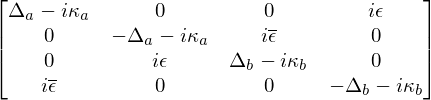

In [9]:
Del  = Matrix([[(-I*kapa + Dela),0,0,I*eps],[0,(-I*kapa-Dela),I*conjugate(eps),0],[0,I*eps,(-I*kapb + Delb),0],\
               [I*conjugate(eps),0,0,(-I*kapb - Delb)]])
Del

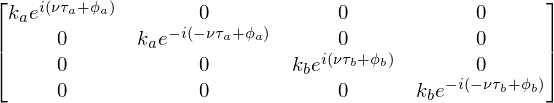

In [10]:
F = diag(ka*exp(I*(pha+nu*ta)),ka*exp(-I*(pha-nu*ta)),kb*exp(I*(phb+nu*tb)),kb*exp(-I*(phb-nu*tb)))
F

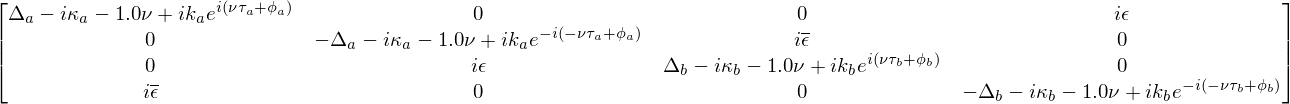

In [11]:
coef = -(nu*np.identity(4) - Del - I*F)
coef

if we introduce
$$\begin{align}
d_{\pm\mu}(\nu) &= \kappa_\mu + i(\nu\pm\Delta_\mu) - k_\mu e^{i(\nu\tau_\mu\pm\phi_\mu)}\\
d_{\pm\mu}(\nu) &= d^*_{\mp\mu}(-\nu)
\end{align}$$
then

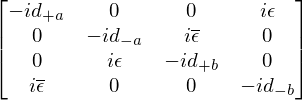

In [12]:
dpa, dma, dpb, dmb = symbols('d_+a d_-a d_+b d_-b')
coef = Matrix([[-I*dpa,0,0,I*eps],[0,-I*dma,I*conjugate(eps),0],[0,I*eps,-I*dpb,0],[I*conjugate(eps),0,0,-I*dmb]])
coef

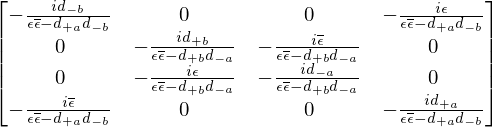

In [13]:
N = coef.inv()
simplify(cancel(N))

Let us introduce the following notations:
$$\begin{align}
\Lambda_{ab}(\nu) &= |\epsilon|^2-d_{+a}(\nu)d_{-b}(\nu)\\
\Lambda_{ba}(\nu) &= |\epsilon|^2-d_{-a}(\nu)d_{+b}(\nu)\\
\Lambda_{ab}(\nu) &= \Lambda^*_{ba}(-\nu)
\end{align}$$
thus
$$
\tilde{\doubleunderline{N}} = -i\left( \begin{matrix}
\frac{d_{-b}}{\Lambda_{ab}} & 0 & 0 & \frac{\epsilon}{\Lambda_{ab}}\\
0 & \frac{d_{+b}}{\Lambda_{ba}} & \frac{\epsilon^*}{\Lambda_{ba}} & 0\\
0 & \frac{\epsilon}{\Lambda_{ba}} & \frac{d_{-a}}{\Lambda_{ba}} & 0\\
\frac{\epsilon^*}{\Lambda_{ab}} & 0 & 0 & \frac{d_{+a}}{\Lambda_{ab}}\end{matrix}\right)$$

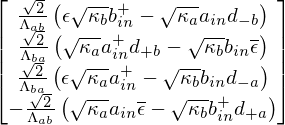

In [14]:
aopin,adopin,bopin,bdopin,Lab,Lba = symbols('a_in a^+_in b_in b^+_in \Lambda_ab \Lambda_ba')
B = I*Matrix([-sqrt(2*kapa)*aopin,sqrt(2*kapa)*adopin,-sqrt(2*kapb)*bopin,sqrt(2*kapb)*bdopin])
N = -I*Matrix([[dmb/Lab,0,0,eps/Lab],[0,dpb/Lba,conjugate(eps)/Lba,0],[0,eps/Lba,dma/Lba,0],[conjugate(eps)/Lab,0,0,dpa/Lab]])
factor(N*B)

which is the field $\hat{\tilde{\underline{a}}}(\nu)$.

$$\def\lsz{\left[}
\def\rsz{\right]}
\def\lk{\left(}
\def\rk{\right)}
\def\lka{\left\{}
\def\rka{\right\}}
\def\dul#1{\underline{\underline{#1}}}
\def\frvecop#1{\hat{\tilde{\underline{#1}}}}
\def\frmat#1{\tilde{\dul{#1}}}$$
### Output fields

The measurement is performed on the fields labeled by the subscripts $(2,out)$.

$$\begin{align}
\hat{\tilde{\underline{a}}}_{2,out} &= \hat{\tilde{\underline{a}}}_{2,in} + \doubleunderline{\kappa}_2\hat{\tilde{\underline{a}}} = \lk\dul{\kappa}_1\dul{\kappa}_2\rk^{-1}\frmat{F}\,\frvecop{a}_{1,in}+ \dul{\kappa}_2^{-1}\lk\frmat{F}+\doubleunderline{\kappa}_2^2\rk\hat{\tilde{\underline{a}}}=\dul{\kappa}_2^{-1}\lka\lsz\dul{\kappa}_1^{-1}\frmat{F}+\lk\frmat{F}+\doubleunderline{\kappa}_2^2\rk\frmat{N}\,\frmat{A}\rsz\frvecop{a}_{1,in}+ \lk\frmat{F}+\doubleunderline{\kappa}_2^2\rk\frmat{N}\,\dul{S}\,\frvecop{\xi}\rka=\\
&=\frmat{O}_1\frvecop{a}_{1,in}+\frmat{O}_2\frvecop{\xi}\\
\frvecop{a}_{2,in} &= \lk\dul{\kappa}_1\dul{\kappa}_2\rk^{-1}\frmat{F}\lk\frvecop{a}_{1,in}+\dul{\kappa}_1\frvecop{a}\rk + \dul{L}_1\frvecop{\xi}\\
\frvecop{a} &= \frmat{N}\frvecop{B}=\frmat{N}\lk\frmat{A}\,\frvecop{a}_{1,in} + \dul{S}\,\frvecop{\xi}\rk\\
\frvecop{B} &= -i\lsz\dul{\kappa}_1^{-1}\lk\dul{\kappa}_1^2+\sqrt{2\pi}\, \frmat{f}\rk\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\frvecop{\xi} \rsz = \frmat{A}\,\frvecop{a}_{1,in} + \dul{S}\,\frvecop{\xi}\\
\dul{L}_1 &= diag(\sqrt{L_a},\sqrt{L_a},\sqrt{L_b},\sqrt{L_b})\\
\doubleunderline{\kappa}_n &= diag(\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,b}},\sqrt{2\kappa_{n,b}})\\
\dul{\kappa}& =\dul{\kappa}_1+\dul{\kappa}_2   
\end{align}$$

## 2. Optomechanical system
* $\hat{a}$ is the optical, whereas $\hat{b}$ is the mechanical mode
* $\Delta_a$ denotes the detuning of the optical mode from the cavity resonance
* $\Delta_b=\Omega_m$, in classical equations $\delta_b=\frac{\Delta_b}{\kappa_a}$ distinguishes between resolved sideband or bad cavity limit
* $k_b=0$, there is no feedback in the mechanical mode
* evolution of phonon number is investigated to examine the degree of cooling

### Laplace Transform
$$\hat{\underline{A}} = \left(s\doubleunderline{\mathbb{1}} + i\doubleunderline{\Delta} + \doubleunderline{F}\right)^{-1} \hat{\underline{A}}=\doubleunderline{G}\ \hat{\underline{A}}$$
where $\doubleunderline{G}$ is the Green function. With the help of this function the fields have the following solution:
$$\hat{\underline{a}}(t) = \doubleunderline{g}(t)\hat{\underline{a}} - i\left(\doubleunderline{g}\ast\underline{\Omega}\right)(t) - i\left(\doubleunderline{g}\ast\hat{\underline{B}}\right)(t) = \doubleunderline{g}(t)\hat{\underline{a}} - i\left(\doubleunderline{g}\ast\underline{\Omega}\right)(t) - i\hat{\underline{C}}(t)$$
The Green-function satisfies the following equation:
$$\frac{d}{dt}\doubleunderline{g}(t) = -i\doubleunderline{\Delta}\ \doubleunderline{g}(t) - \int_0^t\doubleunderline{F}(t-t^\prime)\doubleunderline{g}(t^\prime)$$

### Time-local master equation
$$\frac{d}{dt}\hat{\rho}_S(t) = -i\sum_j\left[\xi_j(t)\hat{a}_j^\dagger,\hat{\rho}_S(t)\right] + 
\sum_{j,k} \left\{\gamma_{jk}(t)\left[\hat{a}_k\hat{\rho}_S(t),\hat{a}_j^\dagger\right] + 
\gamma_{jk}^*(t)\left[\hat{a}_j,\hat{\rho}_S(t)\hat{a}_k^\dagger\right] \right\} +
\sum_{jk}\lambda_{jk}(t)\left[\left[\hat{a}_k,\hat{\rho}_S(t)\right]\hat{a}_j^\dagger\right]$$
where
$$
\begin{align}
\doubleunderline{\gamma}(t) &= -\left(\frac{d}{dt}\doubleunderline{g}(t)\right)\doubleunderline{g}^{-1}(t)\\
\underline{\xi}(t) &= \left(\doubleunderline{\gamma}(t)+\doubleunderline{\mathbb{1}}\frac{d}{dt}\right)
\left(\doubleunderline{g}\ast\underline{\Omega}\right)(t)\\
\doubleunderline{\lambda}(t) &= \frac{d}{dt}\doubleunderline{W}(t) + 
\doubleunderline{\gamma}(t)\doubleunderline{W}(t) + \doubleunderline{W}(t) \doubleunderline{\gamma}^\dagger(t)\\
\doubleunderline{W}(t) &= \int_0^t dt_1\int_0^t dt_2 \doubleunderline{g}(t-t_1)\doubleunderline{V}(t_{12})\doubleunderline{g}(t-t_2)\\
V_{jk}(t_{12}) &= \left< B_k^\dagger(t_2)B_j(t_1)\right>
\end{align}
$$